# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.


In [13]:
data = pd.read_csv('data/beach_sensors.csv')
data.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,63rd Street Weather Station,09/27/2018 10:00:00 AM,16.40,12.2,61,0.0,0.0,260.3,0.0,231,2.5,4.7,996.3,484,356.0,11.9,09/27/2018 10:00 AM,63rdStreetWeatherStation201809271000
1,63rd Street Weather Station,09/27/2018 11:00:00 AM,17.10,11.5,51,0.0,0.0,260.3,0.0,244,3.6,5.7,995.4,468,356.0,11.9,09/27/2018 11:00 AM,63rdStreetWeatherStation201809271100
2,63rd Street Weather Station,09/27/2018 01:00:00 PM,18.20,12.4,51,0.0,0.0,260.3,0.0,248,3.1,5.3,994.8,377,355.0,11.9,09/27/2018 1:00 PM,63rdStreetWeatherStation201809271300
3,Foster Weather Station,09/27/2018 01:00:00 PM,17.89,NaN,39,NaN,0.0,NaN,NaN,249,1.4,2.3,993.6,0,NaN,15.1,09/27/2018 1:00 PM,FosterWeatherStation201809271300
4,63rd Street Weather Station,09/27/2018 03:00:00 PM,19.50,13.0,47,0.0,0.0,260.3,0.0,249,3.1,5.7,992.9,461,355.0,11.9,09/27/2018 3:00 PM,63rdStreetWeatherStation201809271500


In [3]:
#QUESTION1

#display data shape
print(data.shape)

#display column names
print(data.columns.tolist())

#display column datatypes
print(data.dtypes)

#display date range of dataset
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])
print(f"Date range: {data['Measurement Timestamp'].min()} to {data['Measurement Timestamp'].max()}")

#display missing data values per column
print(data.isnull().sum())


(196315, 18)
['Station Name', 'Measurement Timestamp', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life', 'Measurement Timestamp Label', 'Measurement ID']
Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                         int64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                   int64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                  int64
Heading                        float64
Battery Life                   float64
Measurement Timestamp L

In [4]:
#write summary information file
with open('output/q1_data_info.txt', 'w') as f:
    f.write(f"Data Shape: {data.shape}\n\n")
    f.write("Column Names:\n")
    for col in data.columns:
        f.write(f"{col}\n")
    f.write("\nColumn Data Types:\n")
    f.write(f"{data.dtypes}\n\n")
    f.write(f"Date Range: {data['Measurement Timestamp'].min()} to {data['Measurement Timestamp'].max()}\n\n")
    f.write("Missing Data Values per Column:\n")
    f.write(f"{data.isnull().sum()}\n")

In [5]:
#QUESTION1.2

#csv file with summary

#specify numeric columns only
numeric_cols = data.select_dtypes(include=np.number)

summary = pd.DataFrame({
    'Columns': numeric_cols.columns,
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Std Dev': numeric_cols.std(),
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Missing Values': numeric_cols.isnull().sum()
})

summary.to_csv('output/q1_exploration.csv', index=False)

In [26]:
summary

,Columns,Mean,Median,Std Dev,Min,Max,Missing Values
Air Temperature,Air Temperature,12.624084,13.7,10.435531,-29.78,37.60,75
Wet Bulb Temperature,Wet Bulb Temperature,10.274717,11.6,9.404011,-28.90,28.40,75948
Humidity,Humidity,68.023977,69.0,15.633929,0.00,100.00,0
Rain Intensity,Rain Intensity,0.158926,0.0,1.794015,0.00,183.60,75948
Interval Rain,Interval Rain,0.142366,0.0,1.096918,-0.90,63.42,0
Total Rain,Total Rain,141.483876,55.5,190.458439,0.00,1056.10,75948
Precipitation Type,Precipitation Type,4.268321,0.0,15.590635,0.00,70.00,75948
Wind Direction,Wind Direction,140.803016,115.0,122.007749,0.00,359.00,0
Wind Speed,Wind Speed,2.918785,2.9,5.341853,0.00,999.90,0
Maximum Wind Speed,Maximum Wind Speed,3.556962,3.1,5.955077,0.00,999.90,0


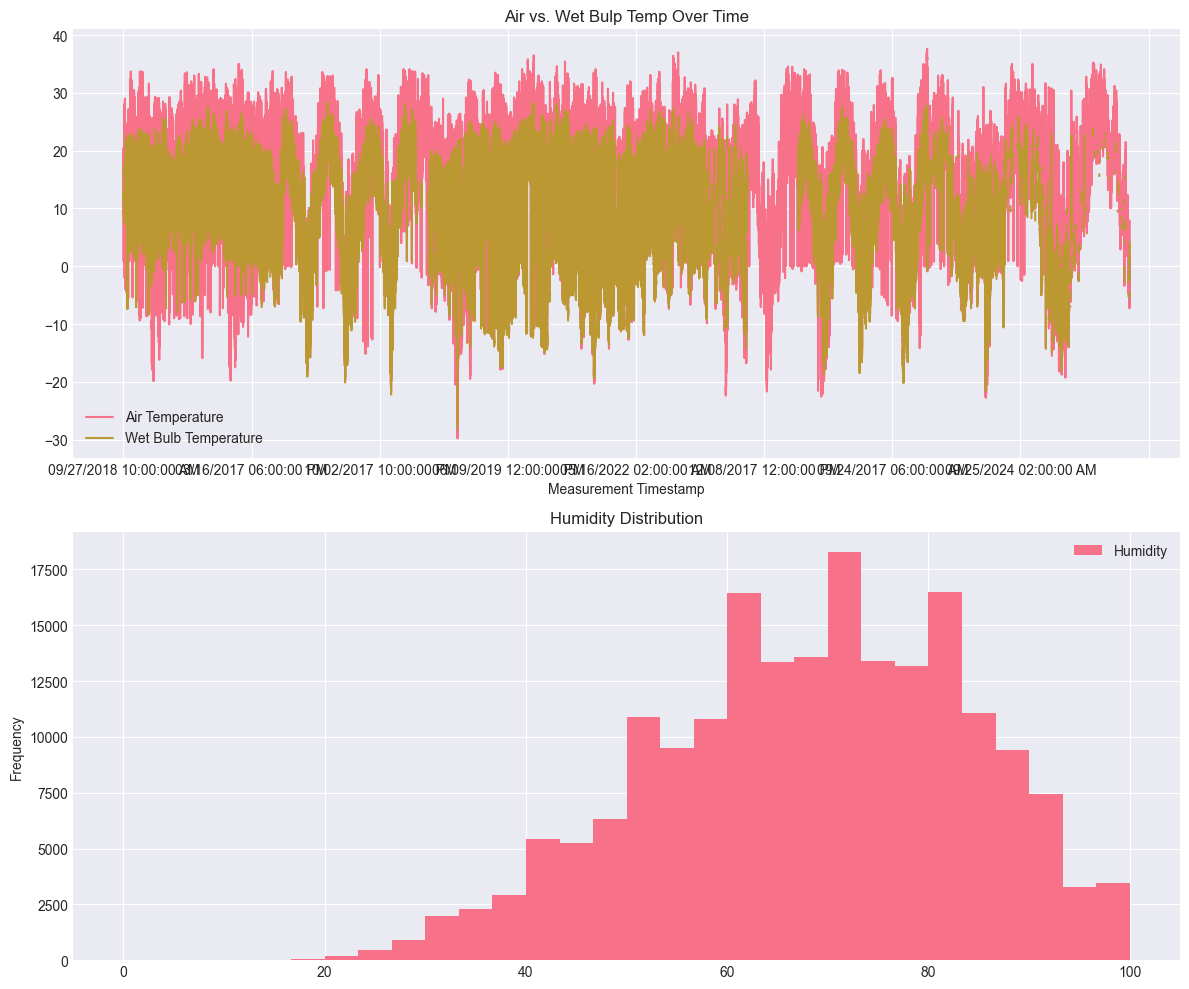

In [23]:
#QUESTION1.3

#set up 2 plots

fig, axes = plt.subplots(2, 1, figsize=(12, 10))


data.plot(kind = 'line', ax = axes[0], title = 'Air vs. Wet Bulp Temp Over Time',
                   x = 'Measurement Timestamp', y = ['Air Temperature', 'Wet Bulb Temperature'])

data.plot(kind = 'hist', ax= axes[1], title = 'Humidity Distribution',
                   y = 'Humidity', bins = 30)
plt.tight_layout()

#save figure to png
plt.savefig('output/q1_visualizations.png')

##########
